**Import required Libraries**

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

**Load Dataset**

In [111]:
df = pd.read_csv('/content/heart-disease.csv')

In [112]:
df.shape

(303, 14)

**Data Exploration & Cleaning**

In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [115]:
# Count number of rows in each class (The difference is small so we skip)
df['target'].value_counts()


,count
target,
1,165
0,138


In [116]:
# Checking missing values
missing_values = df.isnull().sum()
print("Missing values per column (NO missing Values):")
print(missing_values)

Missing values per column (NO missing Values):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [117]:
# Check duplicate
rows_before = df.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")
df.drop_duplicates(inplace=True)
rows_after = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

Number of rows before removing duplicates: 303
Number of rows after removing duplicates: 302


**Apply EDA (Exploratory Data Anlaysis)**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [119]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


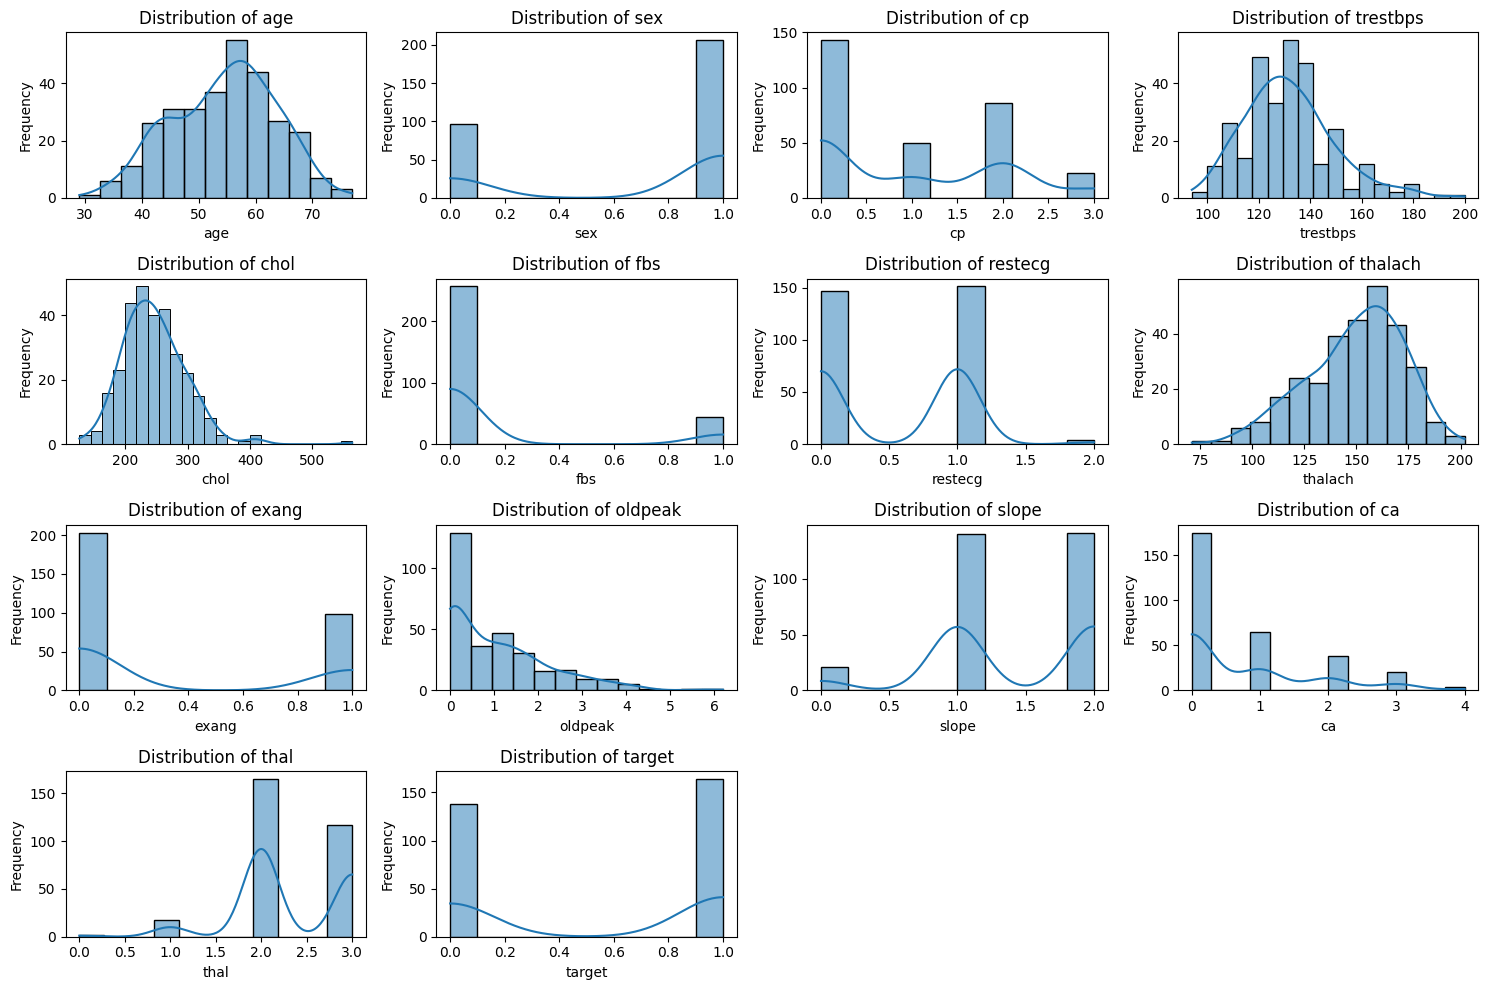

In [120]:
# Understand the distribution of each feature.
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

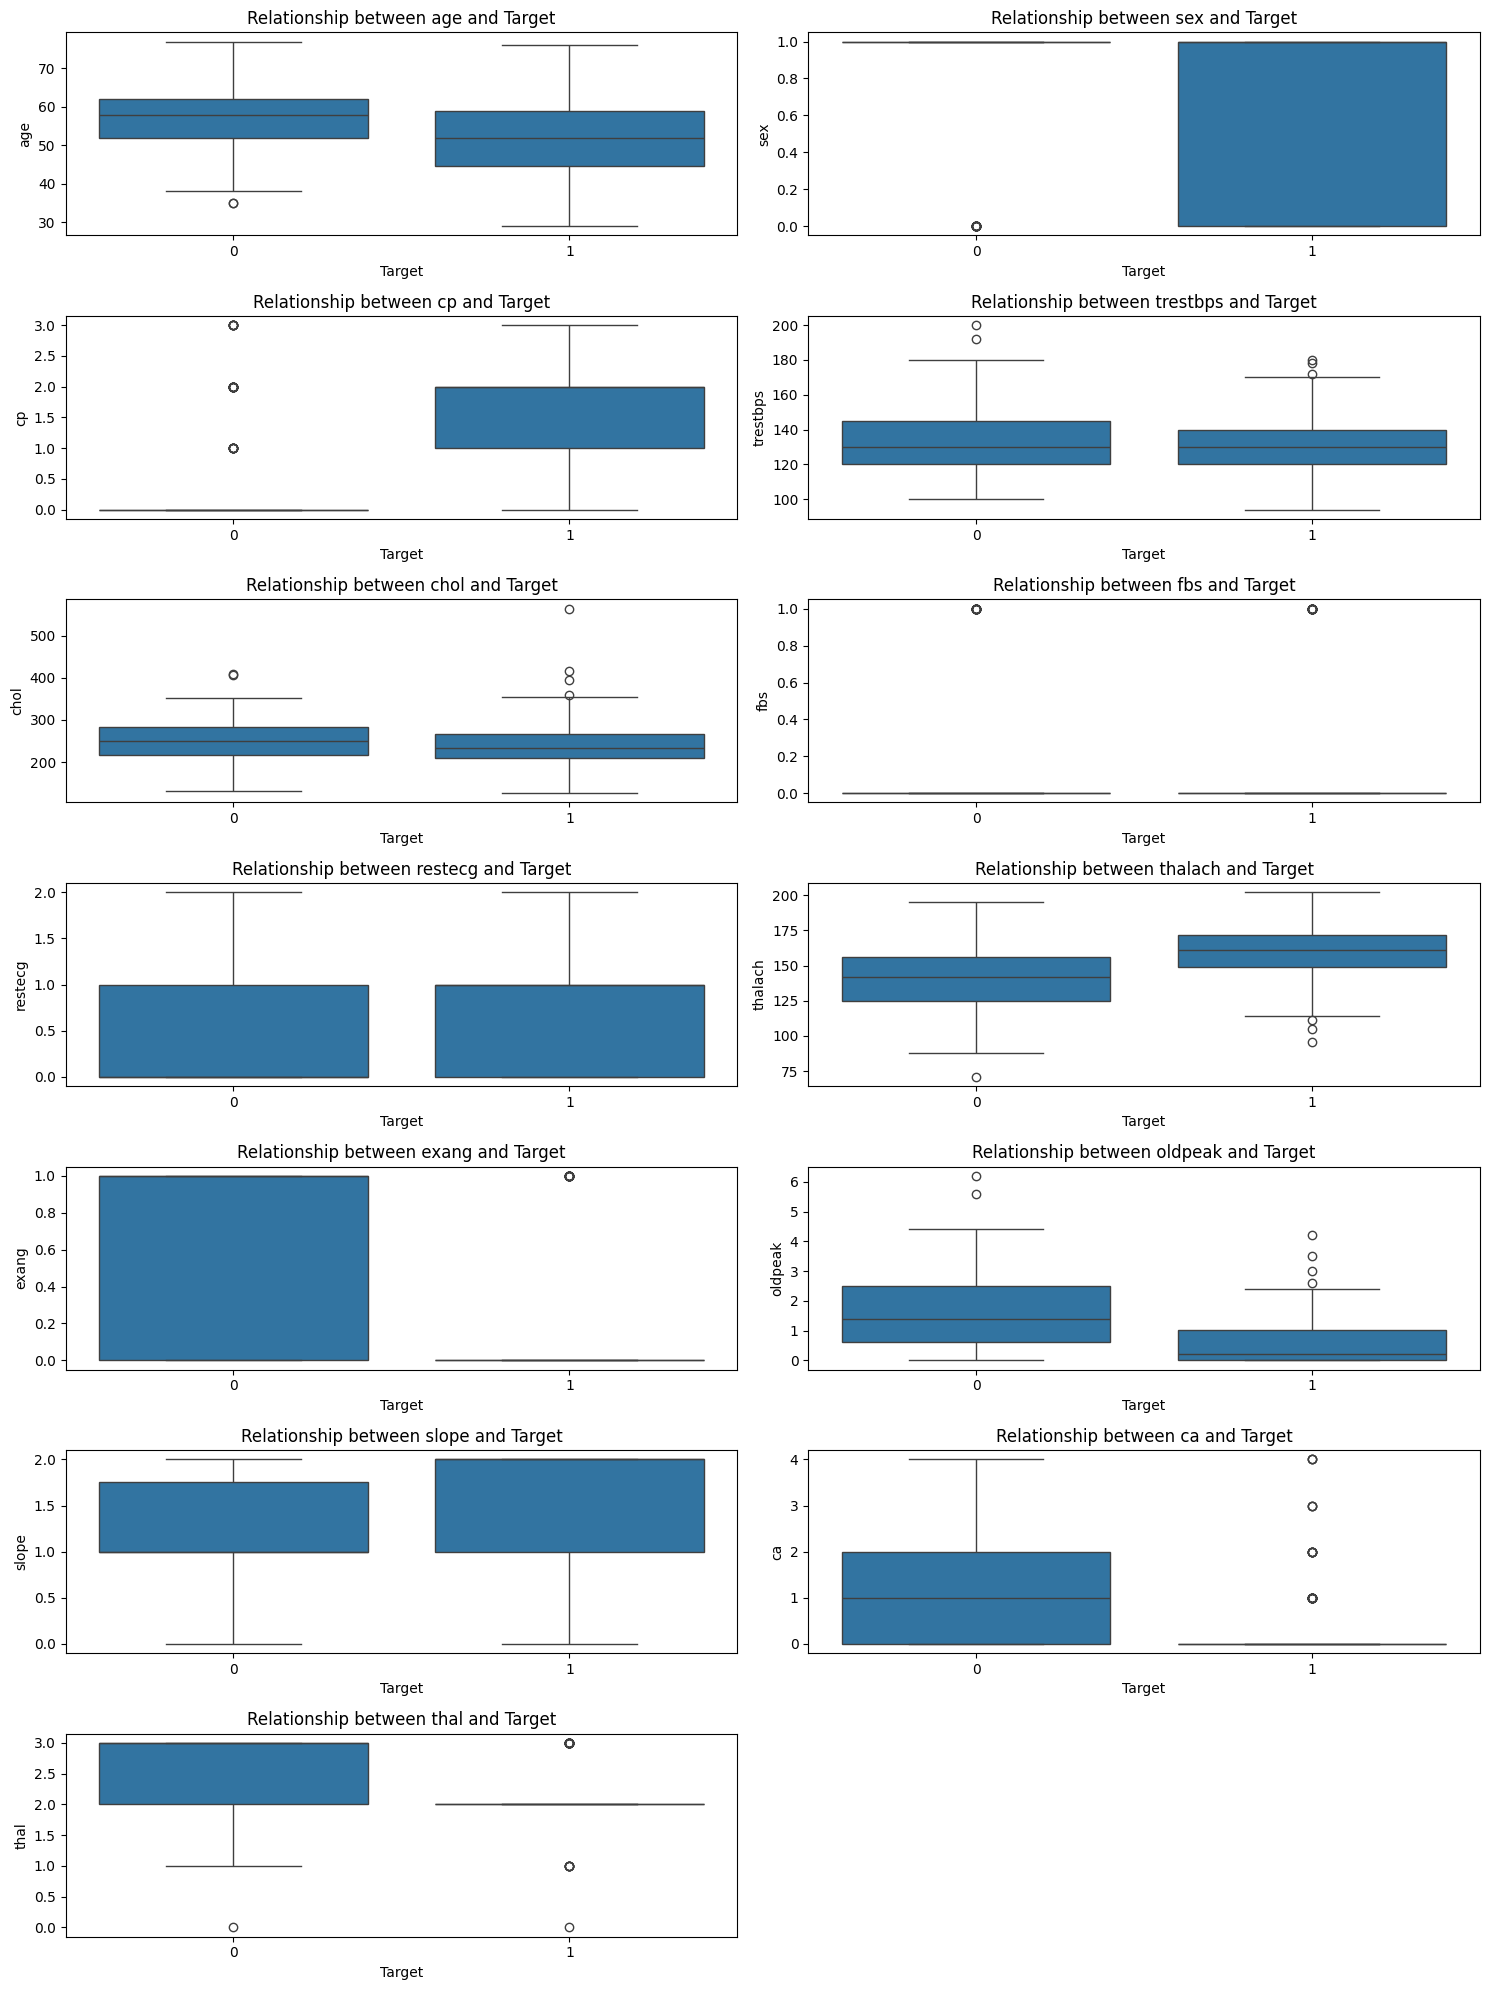

In [121]:
# Generate box plots for numerical features against the target variable to visualize their relationships.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('target')

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'Relationship between {col} and Target')
    plt.xlabel('Target')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

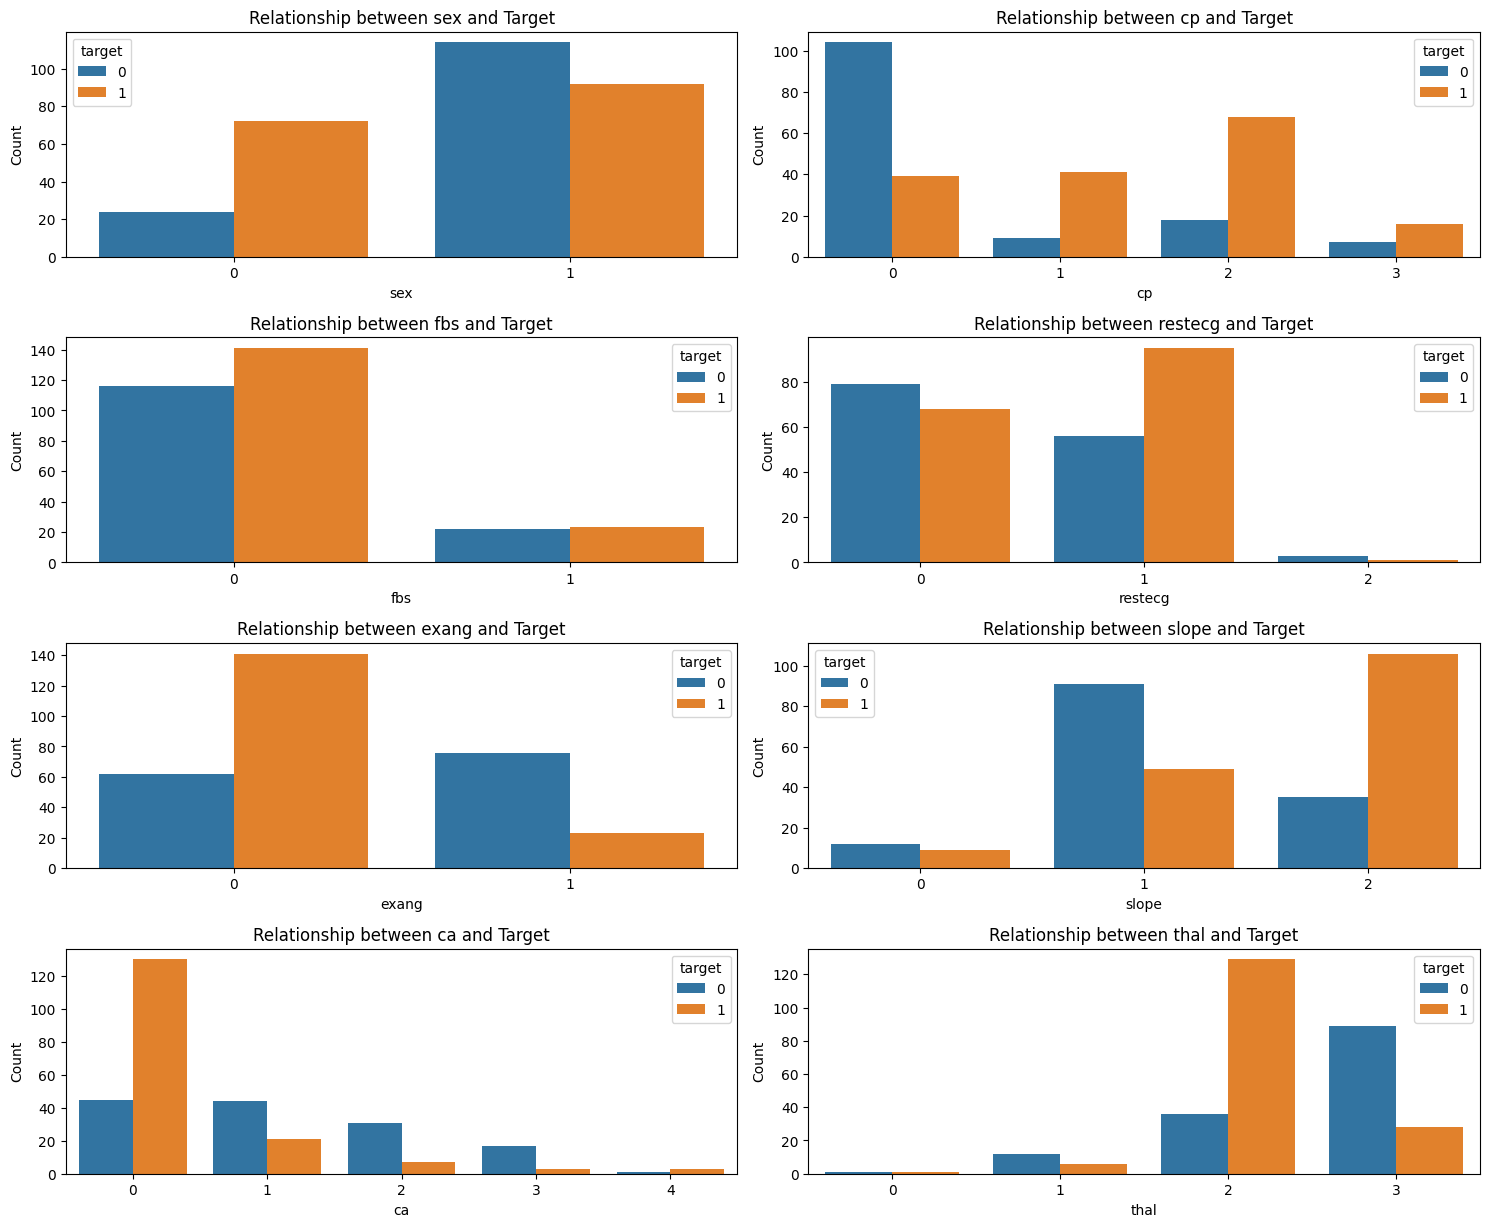

In [122]:
# Generate count plots for categorical features against the target variable to visualize their relationships.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i + 1)
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'Relationship between {col} and Target')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

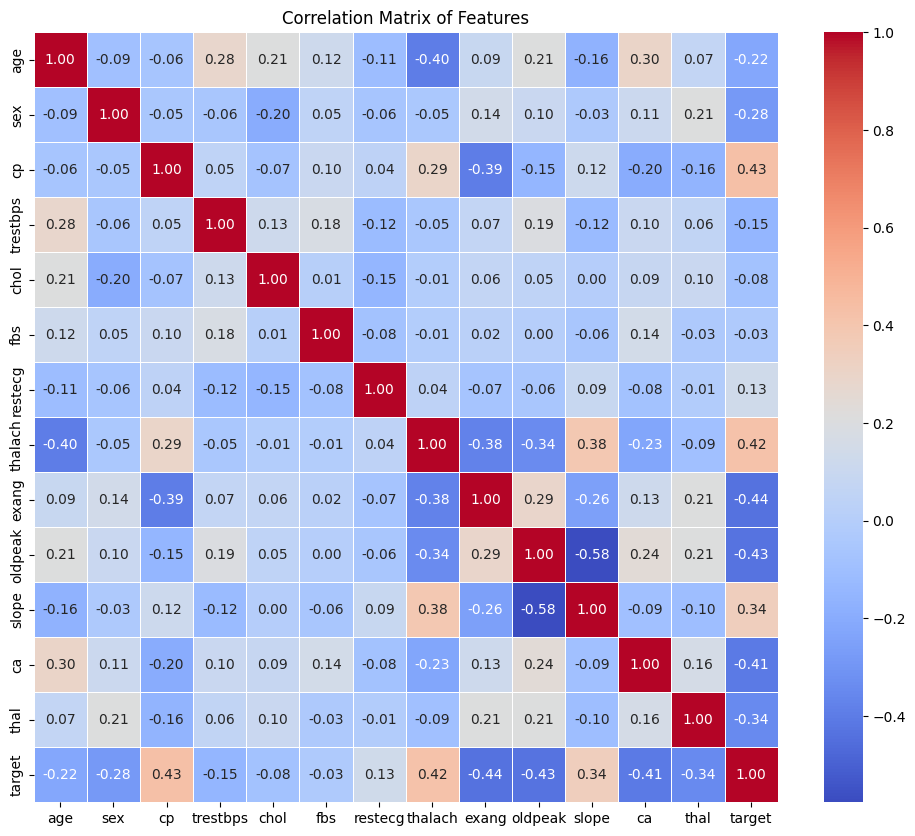

In [123]:
# visualize the correlation matrix to identify relationships between numerical features.
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [124]:
def iqr_filter(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    high = q3 + k * iqr
    return (series < low) | (series > high)

outlier_flags = pd.DataFrame({col: iqr_filter(df[col]) for col in ['age','trestbps','chol','thalach','oldpeak']})
print("Number of outliers per column:")
display(outlier_flags.sum())

Number of outliers per column:


,0
age,0
trestbps,9
chol,5
thalach,1
oldpeak,5


In [125]:
# Option 2 for handling outliers by Imputate them by Mean or Medien.
df_cleaned_imputed = df.copy()

for col in outlier_flags.columns:
    if outlier_flags[col].sum() > 0:
        mean_value = df[col].mean()
        df_cleaned_imputed.loc[outlier_flags[col], col] = mean_value
print(f"Shape of DataFrame after imputing outliers: {df_cleaned_imputed.shape}")

Shape of DataFrame after imputing outliers: (302, 14)


/tmp/ipython-input-2924675047.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '131.60264900662253' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned_imputed.loc[outlier_flags[col], col] = mean_value
/tmp/ipython-input-2924675047.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '246.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned_imputed.loc[outlier_flags[col], col] = mean_value
/tmp/ipython-input-2924675047.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '149.56953642384107' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned_imputed.loc[outlier_flags[col], col] = mean_value


In [126]:
outlier_flags = pd.DataFrame({col: iqr_filter(df_cleaned_imputed[col]) for col in ['age','trestbps','chol','thalach','oldpeak']})
print("Outlier removed:")
display(outlier_flags.sum())

Outlier removed:


,0
age,0
trestbps,0
chol,0
thalach,0
oldpeak,0


**Feature engineering (scaling)**

In [127]:
# Select numerical columns for scaling (excluding 'Condition' which is likely a categorical or binary feature)
numerical_cols =  ['age','trestbps','chol','thalach','oldpeak']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_scaled = df_cleaned_imputed.copy() # Create a copy to avoid modifying the original dataframe
df_scaled[numerical_cols] = scaler.fit_transform(df_cleaned_imputed[numerical_cols])

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [128]:
print("Features Scaled:")
df_scaled.head()

Features Scaled:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.984157,-0.231791,1,0,0.007598,0,1.271124,0,0,1,1
1,-1.928548,1,2,-0.007536,0.149808,0,1,1.658453,0,2.425693,0,0,2,1
2,-1.485726,0,1,-0.007536,-0.882754,0,0,0.989188,0,0.405198,2,0,2,1
3,0.174856,1,1,-0.668664,-0.164450,0,1,1.256894,0,-0.172087,2,0,2,1
4,0.285561,0,0,-0.668664,2.484295,0,1,0.587629,1,-0.364515,2,0,2,1


**Define features(X), target(y) and Split data to train and test**

In [129]:
# Define features (X) and target (Y)
X = df_scaled.drop('target', axis=1)  # Features are all columns except 'target'
y = df_scaled[['target']]             # Target is the 'target' column

# Split the data into training and testing sets (e.g., 80% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (286, 13)
Shape of X_test: (16, 13)
Shape of y_train: (286, 1)
Shape of y_test: (16, 1)


**Model Training & Evaluation**

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [131]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 0.875


In [132]:
# Save model
joblib.dump(model, 'model.pkl')

['model.pkl']

In [133]:
# Download model
from google.colab import files
files.download('model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>